           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9


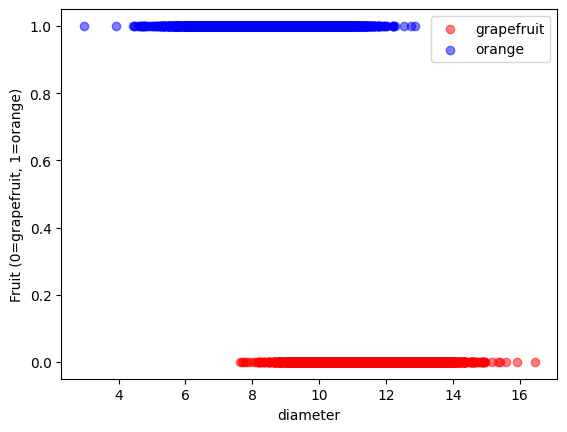

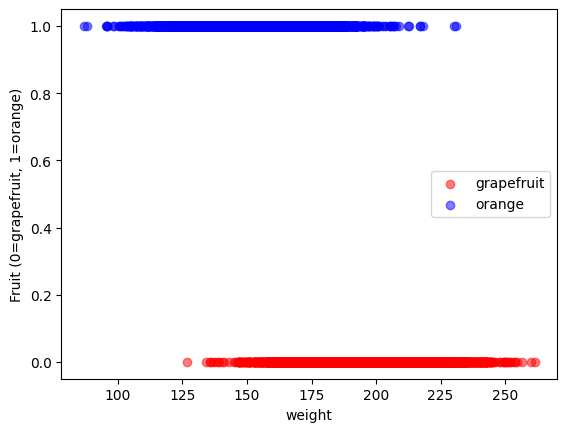

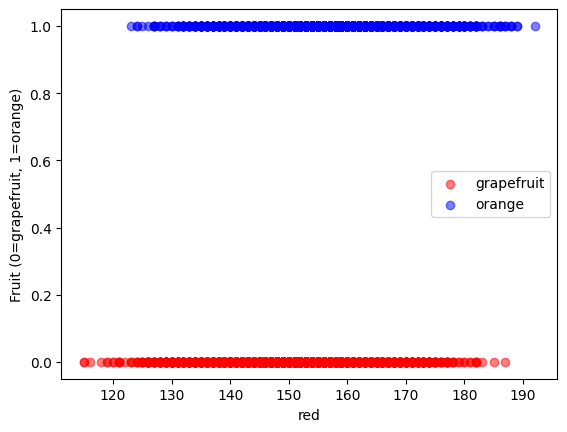

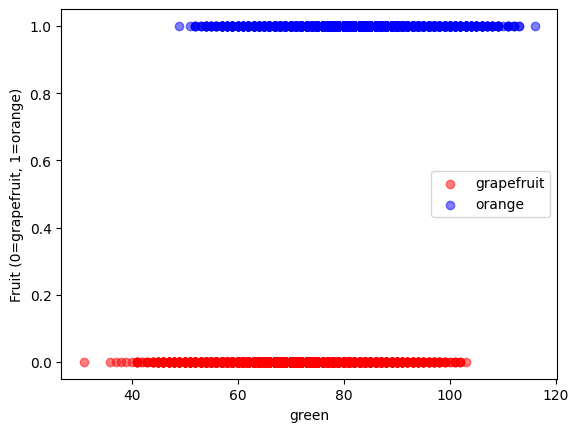

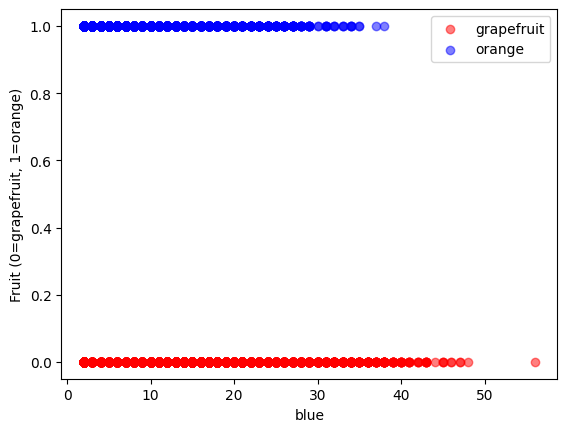

In [15]:
from pandas.core import describe
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import pandas as pd




import pandas as pd
import matplotlib.pyplot as plt

# A) Load the dataset
data = pd.read_csv("citrus.csv")
# Display the summary statistics and first few rows of the dataset
print(data.describe())
print(data.head())



# B) Distribute each column
X = data.drop("name", axis=1)
y = (data["name"] == "orange").astype(int)

# Plot input features against output feature
input_features = list(X.columns)
colors = ["red", "blue"]

for feature in input_features:
    plt.figure()
    for fruit, color in zip([0, 1], colors):
        plt.scatter(X.loc[y == fruit, feature], y[y == fruit], c=color, label="orange" if fruit == 1 else "grapefruit", alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Fruit (0=grapefruit, 1=orange)")
    plt.legend()
    plt.show()


# C) Normalize the data
X_normalized = X / X.max(axis=0)




In [16]:
# Phase 2
# D) Build Model
model = Sequential([
    Dense(2, input_dim=4, activation="relu"),
    Dense(1, activation="sigmoid")
])

# E) Train the data using Keras, TensorFlow
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_normalized, y, epochs=100, batch_size=32, verbose=0)

# F) Continue increasing the number of layers and number of neurons
# (skipped for simplicity)

# G) Print the accuracy
print("Accuracy on the entire dataset:", model.evaluate(X_normalized, y, verbose=0)[1])

# Plot the accuracy during training
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

ValueError: ignored